**Predicting the property of a molecule**

The model should be able to predict the target accurately using different machine learning techniques.

Some of the techniques that can be implemented are:

1) Supervised Learning --> Linear regression, Random Forest, XGBoost etc,.

2) Unsupervised Learning --> Clustering, PCA etc,.

3) Splitting --> Random, Stratified, Scaffold.


The main motivation is to use various machine learning methods to accurately predict the target of a molecule. Few journal papers on property prediction are listed below for your reference.

The Notebook is divided into 3 parts:

1. Preprocessing of data
2. Model architecture using AutoML 
3. Training and visualization of results

## Install the dependencies

1. Pandas --> pip install pandas
2. Numpy --> pip install numpy
3. Seaborn --> pip install seaborn
3. tqdm --> pip install tqdm
4. rdkit --> pip install rdkit-pypi
5. Pycaret --> pip install pycaret or (pip install pycaret[full])

**PART 1** :

**Preprocessing** : 

The input given is smile, which is a molecule. This molecule needs to be transformed into understandable/structured data. Using rdkit module the molecules can be represented in numerical format. The data needs to be processed before training the module.


In [1]:
# importing the necessary modules
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd
from tqdm import tqdm
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors


In [2]:

# importing the smiles file
df = pd.read_csv('/home/mouli/Documents/Intern/BL/descriptors/Parp_New_data_converted.csv')
df.head()

,SMILES,ACTIVITY
0,Br.CN(C)Cc1cc2c([nH]c(=O)c3cccc(O)c32)s1,7.537602
1,Br.Cc1cccc2c(=O)[nH]c(-c3ccc(CN)cc3)nc12,6.575118
2,Br.NCc1nc(-c2ccc3[nH]c4c5c(c6c(c4c3c2)C(=O)NC6...,7.376751
3,C#CCOc1ccc(-c2nc3c(C(N)=O)cccc3[nH]2)cc1,7.586700
4,C#CCOc1ccc(-c2nc3cccc4c3n2CCNC4=O)cc1,7.724689


we should represent the smiles in numerical format. There are different representation of files like 
descriptors, maccs fingerprints, pathbased fingerprints, circular fingerprints, pubchem fingerprints.

Here, we focus on converting smiles to **DESCRIPTORS**
The functions code for remaining representations can be found in the link mentioned at the end.

In [3]:

def descriptors(data):
    print("desp_calculation")
    descriptors_list = [x[0] for x in Descriptors._descList]
    desp_df=pd.DataFrame(columns=descriptors_list)
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    for i,r in tqdm(enumerate(data)):
        try:
            ds = list(calc.CalcDescriptors(Chem.MolFromSmiles(r)))
            desp_df.loc[i]=ds
        except:
            continue
    
    return desp_df

In [4]:
# the input should be the smiles data from df

conv_data = descriptors(df['SMILES'])

desp_calculation


3017it [00:58, 51.20it/s]


In [5]:
# looking at the converted data
conv_data.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,12.005956,-0.155877,12.005956,0.000000,0.742867,355.257,340.137,354.003761,106.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,12.132631,-0.114258,12.132631,0.000000,0.749458,346.228,330.100,345.047674,108.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12.658120,-0.300852,12.658120,0.000000,0.388438,469.364,452.228,468.025559,146.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,11.441400,-0.498442,11.441400,0.228131,0.723880,291.310,278.206,291.100777,108.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12.197928,-0.052007,12.197928,0.052007,0.755067,317.348,302.228,317.116427,118.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Some times this converted data has some missing, nan or infinte values which may cause an error while training. So, it is important to preprocess the data before training.

While preprocessing the target column aslo needs to be included.

In [6]:
#drops the current index of the DataFrame and replaces it with an index of increasing integers.
conv_data.reset_index(drop=True, inplace=True)

In [7]:
# concating the smiles data and target column
dataset = pd.concat([conv_data, df['ACTIVITY']],axis =1)
dataset.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,ACTIVITY
0,12.005956,-0.155877,12.005956,0.000000,0.742867,355.257,340.137,354.003761,106.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.537602
1,12.132631,-0.114258,12.132631,0.000000,0.749458,346.228,330.100,345.047674,108.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.575118
2,12.658120,-0.300852,12.658120,0.000000,0.388438,469.364,452.228,468.025559,146.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.376751
3,11.441400,-0.498442,11.441400,0.228131,0.723880,291.310,278.206,291.100777,108.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.586700
4,12.197928,-0.052007,12.197928,0.052007,0.755067,317.348,302.228,317.116427,118.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.724689


In [8]:
# processing the data
dataset.replace([np.inf, -np.inf], np.nan, inplace=True) 
dataset.fillna(dataset.mean(), inplace = True)

In [9]:
print(np.any(np.isnan(dataset)))
print(np.all(np.isfinite(dataset)))

False
True


There are two approaches after this.
1. Can train the model with entire data. AutoML will automatically splits the data and trains the model. 
2. Split the data in to train and test. The test data will be used later to validate the AutoML results.

Here, we will follow the second approach.

There are manily 3 typed of splitting
1. Random Split
2. Stratified Split
3. Scaffold Split

The random and stratified split can be implemented using sklean module. To implement scaffold split another function has to be written.


Here we will look at **random** split approach. 
The code for scaffold split can be found here in the link mentioned at the end

In [10]:
features = dataset.iloc[:, :-1]
target = dataset.iloc[:,-1]

x_test is used to find the results and validate it with y_test

In [11]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state  = 42)
train_data = pd.concat([x_train, y_train], axis = 1)
train_data.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,ACTIVITY
96,12.613277,-0.607091,12.613277,0.095455,0.738992,387.440,362.240,387.190654,150.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.939302
1616,12.861717,-0.554490,12.861717,0.124879,0.883149,356.470,328.246,356.221226,140.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.022276
2584,11.974806,-0.130057,11.974806,0.130057,0.731581,287.750,273.638,287.082540,102.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.279841
1407,12.569195,0.042084,12.569195,0.042084,0.669473,426.524,400.316,426.216809,162.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.175874
2619,10.946215,-0.496481,10.946215,0.103192,0.402689,240.218,232.154,240.053492,88.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.214670


Sometimes preprocessing may involve removing highly corelated features, constant features, normalizing/standardizing the available features. 

These steps can be directly implemented using sklearn module. Pycaret gives some inbuilt functions to implement these processes in *setup*, but flexible. 

The user can use any method but implementing through sklearn is recommended. 

**PART 2** :

**Model Architecture** :


The preprocessing is almost same for every property data. The only change is in which format the smile is getting represented. To convert smile data into fingerprints another function has to be written. 

Here, the AutoML initialization before training is shown.

SVM Model should be created using other modules. In pycaret only Linear SVM is available which is currently incapable of accurately predicting the results.

In [15]:
import jinja2
from pycaret.regression import *
#from pycaret.classification import *
clf = setup(data = train_data, target = 'ACTIVITY', session_id = 123)

,Description,Value
0,Session id,123
1,Target,ACTIVITY
2,Target type,Regression
3,Data shape,"(2413, 209)"
4,Train data shape,"(1689, 209)"
5,Test data shape,"(724, 209)"
6,Numeric features,208
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


**PART 3** :

**Training** : 


The Training can be directly done using pycaret. One can create own model or get the best model by comparing models

In [16]:
# selecting the best model
# here the fold is set to 5 since we have only few samples
best_model = compare_models(fold = 5)

#best_models = compare_models(fold = 5, n_select= 3) --> to get the top 3 best models

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.4710,0.4222,0.6497,0.6661,0.0889,0.0739,15.2180
et,Extra Trees Regressor,0.4663,0.4395,0.6627,0.6528,0.0910,0.0735,1.9580
lightgbm,Light Gradient Boosting Machine,0.4840,0.4390,0.6625,0.6526,0.0907,0.0759,1.3160
rf,Random Forest Regressor,0.4993,0.4675,0.6833,0.6314,0.0940,0.0791,2.6460
xgboost,Extreme Gradient Boosting,0.4896,0.4733,0.6878,0.6256,0.0939,0.0765,1.9280
gbr,Gradient Boosting Regressor,0.5416,0.5195,0.7203,0.5906,0.0986,0.0854,0.8700
ada,AdaBoost Regressor,0.7321,0.8046,0.8969,0.3630,0.1201,0.1128,1.3500
omp,Orthogonal Matching Pursuit,0.6974,0.8313,0.9106,0.3457,0.1233,0.1101,0.0420
dt,Decision Tree Regressor,0.6394,0.8896,0.9414,0.2893,0.1277,0.0984,0.0740
ridge,Ridge Regression,0.7043,0.9375,0.9468,0.2707,0.1240,0.1115,0.0440


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

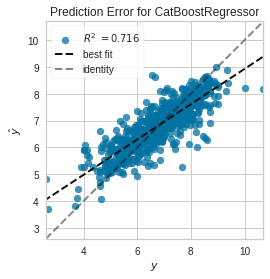

In [17]:
# plotting prediction error
plot_model(best_model, plot = 'error')

Either the best_model or custom model can be created. Here, Random Forest custom model is being created. 

In [30]:
rf = create_model('rf', fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5045,0.4768,0.6905,0.6424,0.0967,0.0819
1,0.5018,0.4837,0.6955,0.6259,0.0975,0.0808
2,0.5121,0.4711,0.6864,0.6557,0.0934,0.0801
3,0.4919,0.5006,0.7075,0.6104,0.0983,0.0787
4,0.4860,0.4052,0.6366,0.6226,0.0842,0.0737
Mean,0.4993,0.4675,0.6833,0.6314,0.0940,0.0791
Std,0.0093,0.0327,0.0244,0.0159,0.0052,0.0029


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

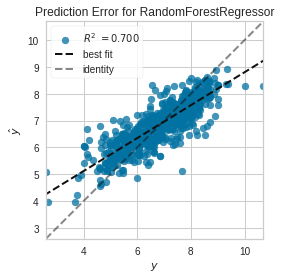

In [31]:
plot_model(rf, plot = 'error')

In [32]:
# we have another dataset call x_test, remember?
# we can use it here to predict the results

predictions = predict_model(rf, data = x_test)

Label column is created which is the predicted output. 

In [33]:
predictions

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,Label
1338,13.017392,-0.570632,13.017392,0.105072,0.774837,354.410004,332.234009,354.169189,136.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.909789
1230,11.235371,-0.079907,11.235371,0.079907,0.629623,160.175995,152.112000,160.063660,60.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.205632
478,11.599537,-0.063287,11.599537,0.063287,0.668651,188.229996,176.134003,188.094955,72.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.961930
44,12.695645,-0.330921,12.695645,0.163816,0.432733,416.462006,400.334015,416.094299,148.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.378459
1071,14.779925,-0.564796,14.779925,0.024006,0.581317,523.653015,485.348999,523.295898,204.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.206533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,12.210130,-0.084808,12.210130,0.084808,0.767572,335.411011,314.243011,335.174622,128.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.456797
283,13.636656,-0.684214,13.636656,0.096397,0.675066,330.388000,315.268005,330.095062,118.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.145407
231,14.598160,-0.853594,14.598160,0.071632,0.487814,523.536011,496.320007,523.191895,198.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.361081
2784,11.898930,-0.155309,11.898930,0.155309,0.611672,264.110992,257.054993,262.990479,84.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.840094


In [34]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions['Label'])

0.713311494517408

Feature importance plot is used for looking at the variables that contributed more to the model prediction

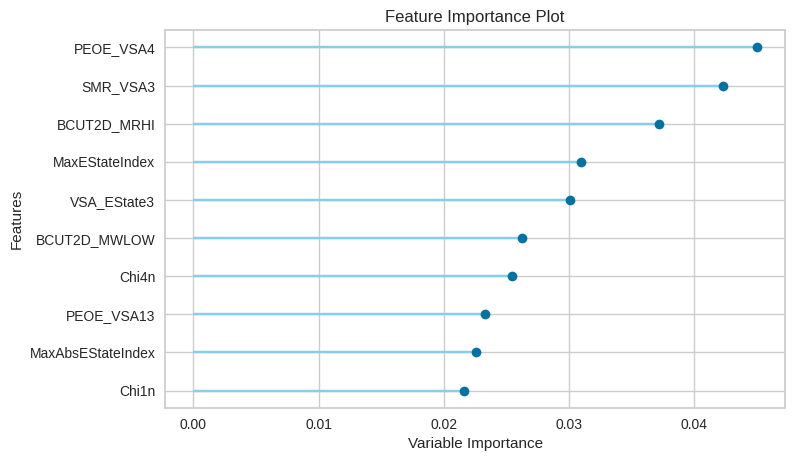

In [35]:
plot_model(rf, plot = 'feature')

**Fine Tuning**

The hyperparameter tuning can be directly done using AutoML. The inbuild *tune_model* function can be used along with the loss function that needs to be optimized. Here, the best model is used for tuning.

In [39]:
tuned_model = tune_model(rf, fold = 5, optimize = 'R2')

#tuned_model = tune_model(best_model, fold = 5, optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5461,0.5176,0.7194,0.6118,0.1010,0.0891
1,0.5338,0.5181,0.7198,0.5993,0.1009,0.0856
2,0.5377,0.4977,0.7055,0.6363,0.0957,0.0841
3,0.5276,0.5308,0.7286,0.5869,0.1013,0.0844
4,0.5142,0.4455,0.6675,0.5850,0.0887,0.0784
Mean,0.5319,0.5019,0.7081,0.6039,0.0975,0.0843
Std,0.0107,0.0301,0.0216,0.0189,0.0049,0.0035


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [43]:
#plot_model(tuned_model, plot = 'error')

In [42]:
#tuned_predictions = predict_model(tuned_model, data = x_test)
#r2_score(y_test, tuned_predictions['Label'])

For hyperparameter tuning we can also use our own search space as *custom_grid*.

In [50]:
dt = create_model('dt')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6494,0.9899,0.9950,0.3360,0.1374,0.1054
1,0.5891,0.8311,0.9116,0.2883,0.1232,0.0920
2,0.5745,0.7099,0.8426,0.4395,0.1119,0.0884
3,0.6595,0.9818,0.9908,0.2545,0.1362,0.1080
4,0.6550,0.9028,0.9502,0.3538,0.1240,0.1000
5,0.6873,1.0645,1.0317,0.2037,0.1405,0.1093
6,0.6752,1.1836,1.0879,0.1154,0.1476,0.1084
7,0.5127,0.5332,0.7302,0.5625,0.1007,0.0799
8,0.6661,0.8801,0.9382,0.2010,0.1278,0.0988


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

The custom grid for decision tree model is defined below. For other models, the model parameters needs to be specified.

In [51]:

params = {"max_depth": np.random.randint(1,100 ,20),
          "max_features": np.random.randint(1, 200,20),
            "min_samples_leaf": [2,3,4,5,6]}

tuned_dt = tune_model(dt, custom_grid = params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6581,0.8907,0.9438,0.4026,0.1285,0.1052
1,0.5845,0.7000,0.8366,0.4006,0.1114,0.0902
2,0.6590,0.7838,0.8853,0.3812,0.1178,0.1007
3,0.6495,0.8360,0.9144,0.3651,0.1252,0.1038
4,0.6574,0.8707,0.9331,0.3768,0.1246,0.1015
5,0.6383,0.7870,0.8871,0.4112,0.1215,0.1026
6,0.6802,0.9429,0.9710,0.2953,0.1329,0.1093
7,0.4934,0.5338,0.7306,0.5620,0.1005,0.0760
8,0.5701,0.6477,0.8048,0.4120,0.1066,0.0869


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Results can be analysed in the same fashion followed before. Different *ensemble methods* can also be used using pycaret. For more information visit https://pycaret.gitbook.io/docs/

For miscellaneous codes mentioned above --> https://github.com/mouliduddupudi/property-prediction-automl